# Imports

In [ ]:
import compute_sat_feature_data as csfd
import plots as pl

#### Step 2: Run Instance Generation

In [ ]:
csfd.run_python_script("/home/vjurisic/cse3000-how-to-break-a-solver/SharpVelvet/src/generate_instances.py", generators="/home/vjurisic/cse3000-how-to-break-a-solver/SharpVelvet/tool-config/vuk/generator_config_mc.json")

#### Step 2.1: Run Horn_gen Generation

In [ ]:
csfd.run_python_script(
    "/home/vjurisic/cse3000-how-to-break-a-solver/SharpVelvet/generators/horn_gen.py",
    input="/home/vjurisic/cse3000-how-to-break-a-solver/SharpVelvet/out/g2sat.cnf",
    output="/home/vjurisic/cse3000-how-to-break-a-solver/SharpVelvet/instances/2000_horn_instances/g2sat",
    threads=8,
)

#### Step 3: Run Fuzzer

In [ ]:
csfd.run_python_script("/home/vjurisic/cse3000-how-to-break-a-solver/SharpVelvet/src/run_fuzzer.py", counters="/home/vjurisic/cse3000-how-to-break-a-solver/SharpVelvet/tool-config/vuk/counter_config_mc.json", instances="/home/vjurisic/cse3000-how-to-break-a-solver/SharpVelvet/instances/500_horn_instances/chevu")

## Show solve times

In [ ]:
pl.plot_solve_time("/home/vjurisic/cse3000-how-to-break-a-solver/SharpVelvet/out/2025-01-02_chevu_000_fuzz-results.csv")

#### Step 4.1: Compute Chevu Features

In [ ]:
csfd.compute_features("/home/vjurisic/cse3000-how-to-break-a-solver/SharpVelvet/out/cnf/chevu", "/home/vjurisic/cse3000-how-to-break-a-solver/SharpVelvet/out/features_output", "/home/vjurisic/cse3000-how-to-break-a-solver/satzilla_feature_extractor/binaries/features")

#### Step 4.2: Compute Horn Features

In [ ]:
csfd.compute_features("/home/vjurisic/cse3000-how-to-break-a-solver/SharpVelvet/out/cnf/horn", "/home/vjurisic/cse3000-how-to-break-a-solver/SharpVelvet/out/features_output", "/home/vjurisic/cse3000-how-to-break-a-solver/satzilla_feature_extractor/binaries/features")

#### Step 4.2: Compute Biere Features

In [ ]:
csfd.compute_features("/home/vjurisic/cse3000-how-to-break-a-solver/SharpVelvet/out/cnf/biere", "/home/vjurisic/cse3000-how-to-break-a-solver/SharpVelvet/out/features_output", "/home/vjurisic/cse3000-how-to-break-a-solver/satzilla_feature_extractor/binaries/features")

#### Step 4.3: Compute Brummayer Features

In [ ]:
csfd.compute_features("/home/vjurisic/cse3000-how-to-break-a-solver/SharpVelvet/out/cnf/brummayer", "/home/vjurisic/cse3000-how-to-break-a-solver/SharpVelvet/out/features_output", "/home/vjurisic/cse3000-how-to-break-a-solver/satzilla_feature_extractor/binaries/features")

#### Step 5: Process CSV Files

In [ ]:
csfd.process_csv_files("/home/vjurisic/cse3000-how-to-break-a-solver/SharpVelvet/out/features_output")

# Plotting Data

In the following section are all the scripts to visualize above created data

### All SATZilla features

In [1]:
import compute_sat_feature_data as csfd
import plots as pl
import calculate_variance as cv
biere = "/home/vjurisic/cse3000-how-to-break-a-solver/temp_storage/results/biere_features_output.csv"
horn = "/home/vjurisic/cse3000-how-to-break-a-solver/temp_storage/results/horn_features_output.csv"
brummayer = "/home/vjurisic/cse3000-how-to-break-a-solver/temp_storage/results/brummayer_features_output.csv"
chevu = "/home/vjurisic/cse3000-how-to-break-a-solver/temp_storage/results/chevu_features_output.csv"
chevu_1000_csv = "/home/vjurisic/cse3000-how-to-break-a-solver/SharpVelvet/out/features_output/1000_chevu_features_output.csv"
brummayer_1000_csv = "/home/vjurisic/cse3000-how-to-break-a-solver/SharpVelvet/out/features_output/1000_brummayer_features_output.csv"
chevu_1500_csv = "/home/vjurisic/cse3000-how-to-break-a-solver/SharpVelvet/out/features_output/1500_chevu_features_output.csv"
brummayer_1500_csv = "/home/vjurisic/cse3000-how-to-break-a-solver/SharpVelvet/out/features_output/1500_brummayer_features_output.csv"
chevu_2000_csv = "/home/vjurisic/cse3000-how-to-break-a-solver/SharpVelvet/out/features_output/2000_chevu_features_output.csv"
brummayer_2000_csv = "/home/vjurisic/cse3000-how-to-break-a-solver/SharpVelvet/out/features_output/2000_brummayer_features_output.csv"

# Plots

In [2]:
features = pl.get_features_list(biere)
print(features)
print(len(features))

['nvarsOrig', 'nclausesOrig', 'nvars', 'nclauses', 'reducedVars', 'reducedClauses', 'Pre-featuretime', 'vars-clauses-ratio', 'POSNEG-RATIO-CLAUSE-mean', 'POSNEG-RATIO-CLAUSE-coeff-variation', 'POSNEG-RATIO-CLAUSE-min', 'POSNEG-RATIO-CLAUSE-max', 'POSNEG-RATIO-CLAUSE-entropy', 'VCG-CLAUSE-mean', 'VCG-CLAUSE-coeff-variation', 'VCG-CLAUSE-min', 'VCG-CLAUSE-max', 'VCG-CLAUSE-entropy', 'UNARY', 'BINARY+', 'TRINARY+', 'Basic-featuretime', 'VCG-VAR-mean', 'VCG-VAR-coeff-variation', 'VCG-VAR-min', 'VCG-VAR-max', 'VCG-VAR-entropy', 'POSNEG-RATIO-VAR-mean', 'POSNEG-RATIO-VAR-stdev', 'POSNEG-RATIO-VAR-min', 'POSNEG-RATIO-VAR-max', 'POSNEG-RATIO-VAR-entropy', 'HORNY-VAR-mean', 'HORNY-VAR-coeff-variation', 'HORNY-VAR-min', 'HORNY-VAR-max', 'HORNY-VAR-entropy', 'horn-clauses-fraction', 'VG-mean', 'VG-coeff-variation', 'VG-min', 'VG-max', 'KLB-featuretime', 'CG-mean', 'CG-coeff-variation', 'CG-min', 'CG-max', 'CG-entropy', 'cluster-coeff-mean', 'cluster-coeff-coeff-variation', 'cluster-coeff-min', 'c

CSV file sorted by 'reducedClauses' and saved to: /home/vjurisic/cse3000-how-to-break-a-solver/temp_storage/results/biere_features_output.csv
CSV file sorted by 'reducedClauses' and saved to: /home/vjurisic/cse3000-how-to-break-a-solver/temp_storage/results/horn_features_output.csv
CSV file sorted by 'reducedClauses' and saved to: /home/vjurisic/cse3000-how-to-break-a-solver/temp_storage/results/brummayer_features_output.csv
CSV file sorted by 'reducedClauses' and saved to: /home/vjurisic/cse3000-how-to-break-a-solver/temp_storage/results/chevu_features_output.csv


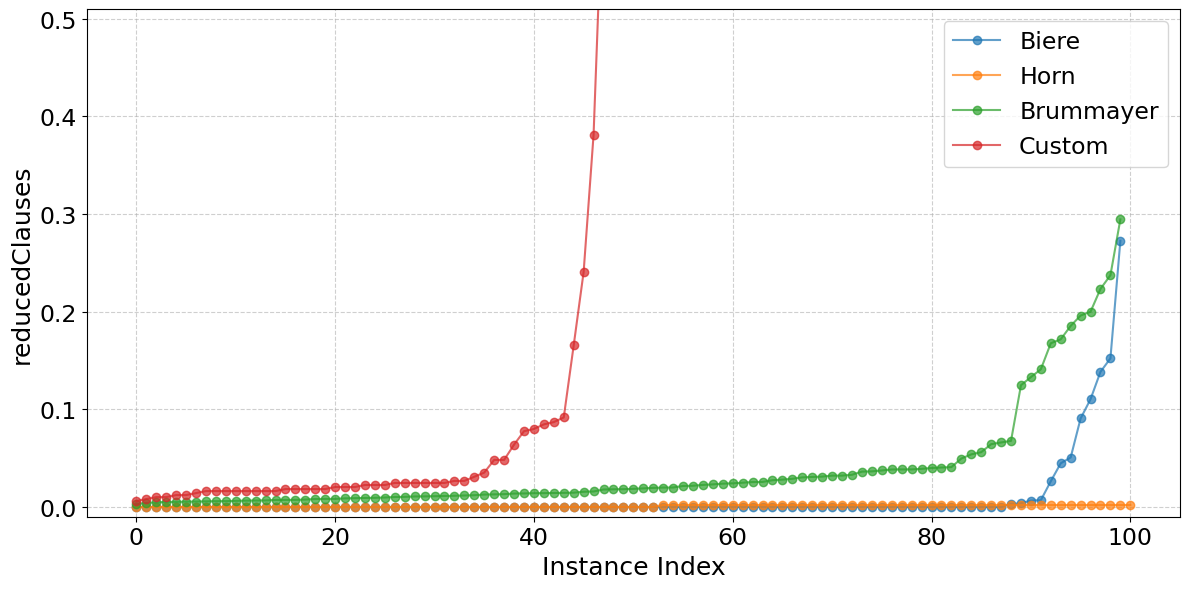

In [3]:
csv_files = [biere, horn, brummayer, chevu]
pl.sort_csv_by_feature(biere, 'reducedClauses', biere)
pl.sort_csv_by_feature(horn, 'reducedClauses', horn)
pl.sort_csv_by_feature(brummayer, 'reducedClauses', brummayer)
pl.sort_csv_by_feature(chevu, 'reducedClauses', chevu)
# # pl.sort_csv_by_feature(chevu_2000_csv, 'reducedClauses', chevu_2000_csv)
# pl.sort_csv_by_feature(brummayer_1000_csv, 'reducedClauses', brummayer_1000_csv)
# pl.sort_csv_by_feature(brummayer_1500_csv, 'reducedClauses', brummayer_1500_csv)
# pl.sort_csv_by_feature(brummayer_2000_csv, 'reducedClauses', brummayer_2000_csv)
labels = ["Biere", "Horn", "Brummayer", "Custom"]
pl.plot_feature_values_combined(csv_files, "reducedClauses", range_min=-0.01, range_max=0.51, labels=labels)


In [ ]:
selected_features = [
    'nvarsOrig', 'nclausesOrig', 'nvars', 'nclauses', 'reducedVars', 'reducedClauses', 
    'Pre-featuretime', 'vars-clauses-ratio', 'POSNEG-RATIO-CLAUSE-mean', 
    'POSNEG-RATIO-CLAUSE-coeff-variation', 'POSNEG-RATIO-CLAUSE-min', 
    'POSNEG-RATIO-CLAUSE-max', 'POSNEG-RATIO-CLAUSE-entropy', 'VCG-CLAUSE-mean', 
    'VCG-CLAUSE-coeff-variation', 'VCG-CLAUSE-min', 'VCG-CLAUSE-max', 
    'VCG-CLAUSE-entropy', 'UNARY', 'BINARY+', 'TRINARY+', 'Basic-featuretime', 
    'VCG-VAR-mean', 'VCG-VAR-coeff-variation', 'VCG-VAR-min', 'VCG-VAR-max', 
    'VCG-VAR-entropy', 'POSNEG-RATIO-VAR-mean', 'POSNEG-RATIO-VAR-stdev', 
    'POSNEG-RATIO-VAR-min', 'POSNEG-RATIO-VAR-max', 'POSNEG-RATIO-VAR-entropy', 
    'HORNY-VAR-mean', 'HORNY-VAR-coeff-variation', 'HORNY-VAR-min', 
    'HORNY-VAR-max', 'HORNY-VAR-entropy', 'horn-clauses-fraction', 'VG-mean', 
    'VG-coeff-variation', 'VG-min', 'VG-max', 'KLB-featuretime', 'CG-mean', 
    'CG-coeff-variation', 'CG-min', 'CG-max', 'CG-entropy', 'cluster-coeff-mean', 
    'cluster-coeff-coeff-variation', 'cluster-coeff-min', 'cluster-coeff-max', 
    'cluster-coeff-entropy'
]

pl.plot_all_feature_values(chevu_2000_csv, selected_features)

In [ ]:
pl.plot_feature_values_with_lines(chevu_2000_csv, "nvars")

In [ ]:
pl.plot_2d_features(chevu_2000_csv, "nclauses", "nvars")

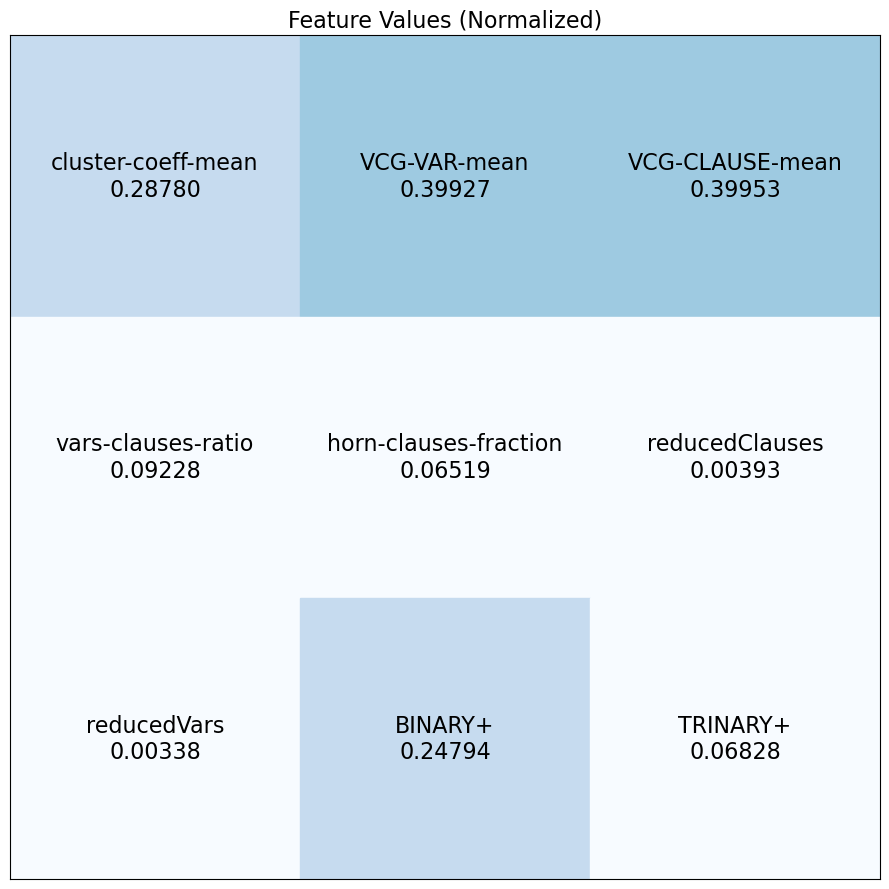

Normalized feature values used in the heatmap:
cluster-coeff-mean: 0.287801
VCG-VAR-mean: 0.399269
VCG-CLAUSE-mean: 0.399531
vars-clauses-ratio: 0.092280
horn-clauses-fraction: 0.065187
reducedClauses: 0.003928
reducedVars: 0.003377
BINARY+: 0.247935
TRINARY+: 0.068276


In [ ]:
cv.plot_variance_table(horn, 1, True, 16)